# Diabetes Patients analysis

I am learning about ML. This is my first data analysis project from kaggle to understand how data engineering works.

Come and join me in this thrilling journey throught data.

In [1]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "diabetes.csv"

# Load the latest version
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "shantanudhakadd/diabetes-dataset-for-beginners",
    file_path,
)

df.head()

/home/d1r3ct0r/Coding/Projects/my-chess-style/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/tmp/ipykernel_3818405/2967437487.py:7: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Let us divide the data into testing and training and let the analysis begin 

In [2]:
df.shape

(768, 9)

In [3]:
from sklearn.model_selection import train_test_split

X = df.drop("Outcome", axis=1)
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [4]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 576 entries, 762 to 684
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               576 non-null    int64  
 1   Glucose                   576 non-null    int64  
 2   BloodPressure             576 non-null    int64  
 3   SkinThickness             576 non-null    int64  
 4   Insulin                   576 non-null    int64  
 5   BMI                       576 non-null    float64
 6   DiabetesPedigreeFunction  576 non-null    float64
 7   Age                       576 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 40.5 KB


### Let us see the correlation between the the various features and with the outcome feature.

In [5]:
import seaborn as sns

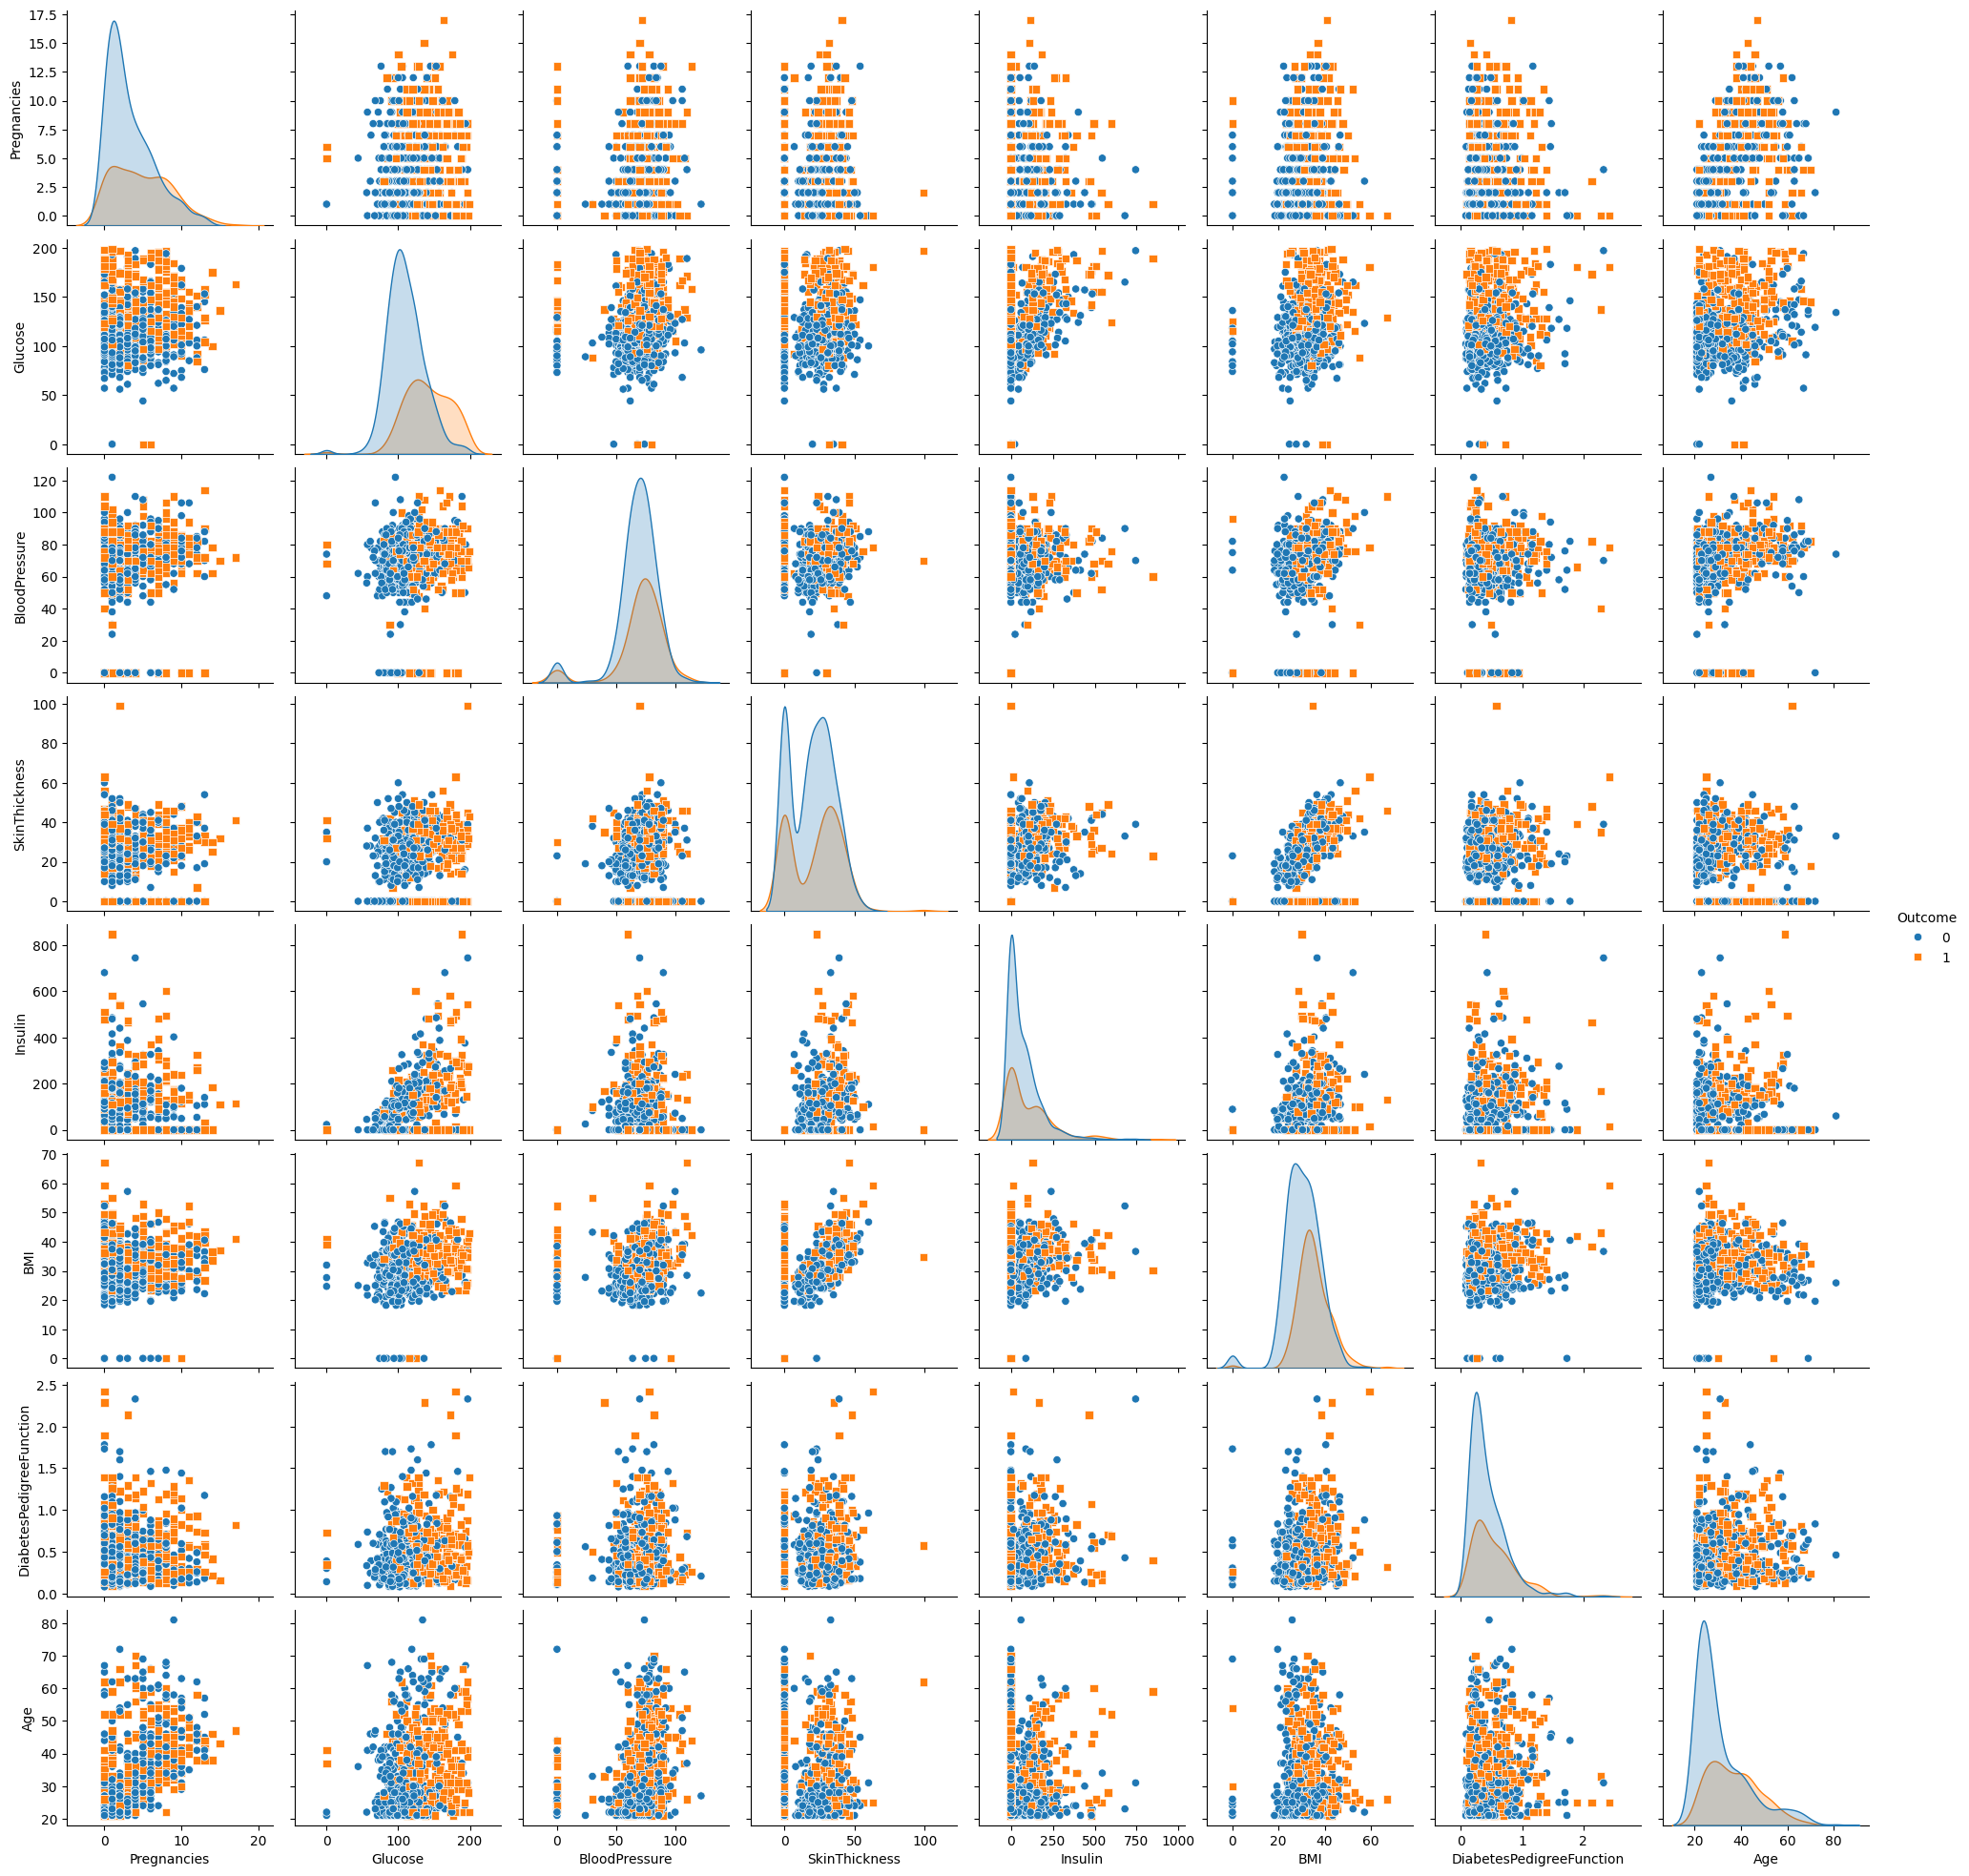

In [6]:
%matplotlib inline
sns.axes_style()
sns.pairplot(df, hue="Outcome", markers=["o", "s"], corner=False)

### Outcome of the pairplot

✅ `Glucose` is a great indicator since the more glucose level the more the chances of having diabetes.

✅ `BMI`, `Age`, `Pregnancies` are also good indicators. The higher the values of the features, we the more the chances of having diabetes.

## Modelling 
Let us checkout various classification algorithms. I will try out various just to to test them out and see how they fare.

### Scaling and standardize the data

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 1. K-nearest neighbours

When k = 1, training_accuracy = 1.0	test_accuracy = 0.7239583333333334
When k = 2, training_accuracy = 0.8246527777777778	test_accuracy = 0.7447916666666666
When k = 3, training_accuracy = 0.8402777777777778	test_accuracy = 0.7291666666666666
When k = 4, training_accuracy = 0.8055555555555556	test_accuracy = 0.7760416666666666
When k = 5, training_accuracy = 0.8055555555555556	test_accuracy = 0.8020833333333334
When k = 6, training_accuracy = 0.7725694444444444	test_accuracy = 0.7916666666666666
When k = 7, training_accuracy = 0.7829861111111112	test_accuracy = 0.7708333333333334
When k = 8, training_accuracy = 0.7673611111111112	test_accuracy = 0.78125
When k = 9, training_accuracy = 0.7795138888888888	test_accuracy = 0.7864583333333334
When k = 10, training_accuracy = 0.7760416666666666	test_accuracy = 0.765625
When k = 11, training_accuracy = 0.78125	test_accuracy = 0.765625
When k = 12, training_accuracy = 0.7690972222222222	test_accuracy = 0.765625
When k = 13, training_accuracy =

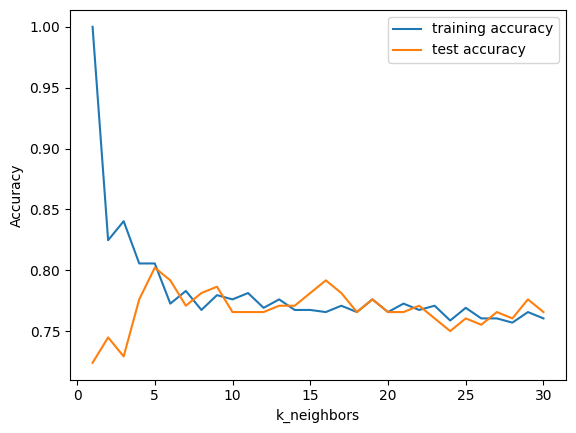

In [8]:
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 31)
for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train_scaled, y_train)
    # record training set accuracy
    training_acc = clf.score(X_train_scaled, y_train)
    print(f"When k = {n_neighbors}, training_accuracy = {training_acc}", end="\t")
    training_accuracy.append(training_acc)
    # record generalization accuracy
    test_acc = clf.score(X_test_scaled, y_test)
    print(f"test_accuracy = {test_acc}")
    test_accuracy.append(test_acc)
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("k_neighbors")
plt.legend()

#### Outcome

The accuracy is between `75 - 80`.

Interestingly, when the `k = 3`, the training accuracy spikes abit, but the test accuracy dips.

### 2. Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=0.1).fit(X_train_scaled, y_train)

print(f"lr.coef_: {lr.coef_}")
print(f"lr.intercept_: {lr.intercept_}")
print(f"Training set score: {lr.score(X_train_scaled, y_train):.2f}")
print(f"Test set score: {lr.score(X_test_scaled, y_test):.2f}")

lr.coef_: [[ 0.26084495  0.90228046 -0.15465034  0.078137   -0.06295709  0.60252784
   0.25813542  0.25756157]]
lr.intercept_: [-0.77644859]
Training set score: 0.76
Test set score: 0.80


#### Outcome

The test accuracy is around `80`.

### 3. Naive Bayes

#### Is the data balanced?

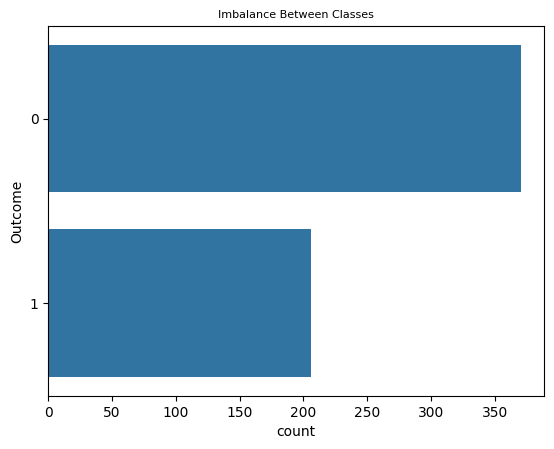

In [12]:
sns.countplot(y=y_train)
plt.title("Imbalance Between Classes", size=8)
plt.show()